In [1]:
import pandas as pd
import numpy as np
import copy

In [2]:
df = pd.read_csv('data/train.csv' , encoding = 'CP949')
df

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A


In [3]:
obj = ['주구매코너']

In [4]:
from sklearn.impute import SimpleImputer
df[obj] = df[obj].apply(lambda x : x.astype('category').cat.codes)

In [5]:
imp_obj = SimpleImputer(strategy = 'most_frequent')
df[obj] = imp_obj.fit_transform(df[obj])

In [6]:
nul = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수']

In [7]:
li1 = [79/(969-79),264/(1013-264),364/(989-364),353/(1028-353),461/(1001-461)]
li1

[0.08876404494382023,
 0.35246995994659547,
 0.5824,
 0.522962962962963,
 0.8537037037037037]

In [8]:
def gender_(x):
    if (x <= 10000):
        return li1[0]
    elif (x <= 20000):
        return li1[1]
    elif (x <= 30000):
        return li1[2]
    elif (x <= 40000):
        return li1[3]
    else :
        return li1[4]

In [9]:
mdf = df.copy()

In [10]:
mdf['custid-gender'] = mdf['custid']
mdf['custid-gender'] = mdf['custid-gender'].apply(gender_)

In [11]:
mdf.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,custid-gender
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,24,0.088764
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,11,0.088764
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,15,0.088764
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,24,0.088764
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,22,0.088764


In [12]:
mean1 = mdf[mdf['custid-gender'] >= 0.6][nul].mean()
mean1

가을_구매건수    11.774971
겨울_구매건수    11.837558
봄_구매건수     12.387387
여름_구매건수    14.279361
아침_구매건수     9.967822
저녁_구매건수     9.135787
점심_구매건수    29.328921
dtype: float64

In [13]:
mean2 = mdf[mdf['custid-gender'] <= 0.4][nul].mean()
mean2

가을_구매건수     7.670912
겨울_구매건수     7.656980
봄_구매건수      7.636473
여름_구매건수     8.097818
아침_구매건수     5.095199
저녁_구매건수     8.727219
점심_구매건수    14.141356
dtype: float64

In [14]:
mean3 = mdf[(mdf['custid-gender'] >0.4) &mdf['custid-gender'] < 0.7][nul].mean()
mean3

가을_구매건수     7.670912
겨울_구매건수     7.656980
봄_구매건수      7.636473
여름_구매건수     8.097818
아침_구매건수     5.095199
저녁_구매건수     8.727219
점심_구매건수    14.141356
dtype: float64

In [15]:
mean1_list = mean1.tolist()
mean2_list = mean2.tolist()
mean3_list = mean3.tolist()

In [16]:
mean1_list

[11.774971297359357,
 11.837557603686635,
 12.387387387387387,
 14.279361459521095,
 9.967821782178218,
 9.135786802030458,
 29.328920570264767]

In [17]:
obj = ['가을','겨울','봄','여름','아침','저녁','점심']

In [18]:
def ct():
    for i in range(3):
        if i == 0:
            for j in nul:
                index = nul.index(j)
                mdf.loc[mdf['custid-gender'] > 0.6, j ] = mdf[mdf['custid-gender'] > 0.6][j].fillna(mean1_list[index])
        elif i == 1:
            for j in nul:
                index = nul.index(j)
                mdf.loc[mdf['custid-gender'] < 0.4, j ] = mdf[mdf['custid-gender'] < 0.4][j].fillna(mean2_list[index])
        elif i == 2:
            for j in nul:
                index = nul.index(j)
                mdf.loc[(mdf['custid-gender'] > 0.4) & (mdf['custid-gender'] < 0.6), j ] = mdf[(mdf['custid-gender'] > 0.4) & (mdf['custid-gender'] < 0.6)][j].fillna(mean3_list[index])
    

In [19]:
ct()

In [20]:
mdf

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,custid-gender
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,7.670912,9.00000,6.0,8.097818,5.095199,6.000000,9.000000,24,0.088764
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,7.670912,5.00000,4.0,8.097818,3.000000,8.727219,6.000000,11,0.088764
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.000000,17.00000,12.0,8.097818,10.000000,11.000000,15.000000,15,0.088764
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.000000,8.00000,15.0,8.097818,5.095199,18.000000,10.000000,24,0.088764
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,7.670912,7.65698,5.0,8.097818,5.095199,5.000000,14.141356,22,0.088764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.000000,33.00000,14.0,33.000000,8.000000,41.000000,44.000000,14,0.853704
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.000000,6.00000,6.0,1.000000,3.000000,9.135787,14.000000,5,0.853704
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.000000,6.00000,6.0,13.000000,16.000000,9.135787,21.000000,24,0.853704
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.000000,4.00000,2.0,1.000000,9.967822,2.000000,11.000000,22,0.853704


In [21]:
%run ML.libaryPackage-1.0.0.ipynb

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import font_manager, rc
import warnings

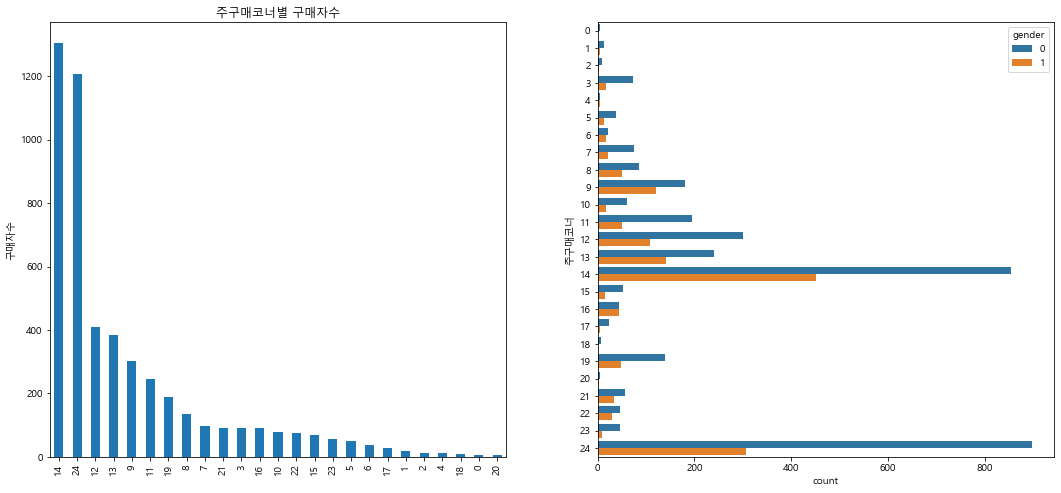

In [23]:
f, ax = plt.subplots(1,2, figsize=(18,8))
mdf['주구매코너'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('주구매코너별 구매자수')
ax[0].set_ylabel('구매자수')
sns.countplot(y='주구매코너', hue='gender', data=mdf, ax=ax[1])
plt.show()

In [24]:
a = pd.crosstab([mdf['custid-gender']],mdf['주구매코너'],margins=True)
a = a.iloc[:-1,:-1]
a

주구매코너,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
custid-gender,,,,,,,,,,,,,,,,,,,,,
0.088764,2,3,2,18,2,0,0,31,13,32,...,21,11,4,0,65,1,9,18,23,319
0.352470,0,7,4,15,1,3,13,20,23,24,...,19,26,6,2,51,0,24,13,11,294
0.522963,0,4,1,15,4,12,3,16,33,105,...,6,18,3,3,23,2,19,6,9,157
0.582400,3,2,3,16,3,3,17,12,22,56,...,13,14,12,2,27,1,18,20,6,218
0.853704,2,2,2,27,1,33,5,17,45,84,...,9,21,3,1,22,2,21,18,7,218


In [25]:
a_0 = pd.crosstab([mdf['custid-gender']],mdf['주구매코너'],margins=True).iloc[0,:-1].tolist()
a_1 = pd.crosstab([mdf['custid-gender']],mdf['주구매코너'],margins=True).iloc[1,:-1].tolist()
a_2 = pd.crosstab([mdf['custid-gender']],mdf['주구매코너'],margins=True).iloc[2,:-1].tolist()
a_3 = pd.crosstab([mdf['custid-gender']],mdf['주구매코너'],margins=True).iloc[3,:-1].tolist()
a_4 = pd.crosstab([mdf['custid-gender']],mdf['주구매코너'],margins=True).iloc[4,:-1].tolist()
a_total = [a_0,a_1,a_2,a_3,a_4]

In [26]:
li1

[0.08876404494382023,
 0.35246995994659547,
 0.5824,
 0.522962962962963,
 0.8537037037037037]

In [27]:
li = []
def cal():
    for i in range(len(a_1)):
        sum = 0
        for j in range(len(a_total)) :
            num = li1[j] * a_total[j][i]
            sum += num
        li.append(sum)
    print(li)

In [28]:
cal()

[3.4538243861839373, 7.816515187790962, 5.446104225970319, 47.03820961559511, 5.282190642426829, 37.7873209909509, 19.48819836819463, 39.90800311070886, 78.40179351489321, 173.44876551395757, 41.11394884676309, 99.43568285948751, 159.3537248268325, 182.29258103472128, 722.9993429917099, 26.53722603465739, 45.87308271225277, 13.053742606121522, 4.35176954952282, 70.04231236010617, 3.4839344153141907, 47.66486655432379, 35.50018821422043, 20.274046296824118, 523.4920318947111]


In [29]:
li

[3.4538243861839373,
 7.816515187790962,
 5.446104225970319,
 47.03820961559511,
 5.282190642426829,
 37.7873209909509,
 19.48819836819463,
 39.90800311070886,
 78.40179351489321,
 173.44876551395757,
 41.11394884676309,
 99.43568285948751,
 159.3537248268325,
 182.29258103472128,
 722.9993429917099,
 26.53722603465739,
 45.87308271225277,
 13.053742606121522,
 4.35176954952282,
 70.04231236010617,
 3.4839344153141907,
 47.66486655432379,
 35.50018821422043,
 20.274046296824118,
 523.4920318947111]

In [30]:
def ap(x):
    for i in range(1,len(li)+1):
        if (x == i):
            return li[i-1]

In [31]:
# if (x <= 10000):
#         return li1[0]

In [32]:
mdf1 = mdf.copy()
mdf1

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,custid-gender
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,7.670912,9.00000,6.0,8.097818,5.095199,6.000000,9.000000,24,0.088764
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,7.670912,5.00000,4.0,8.097818,3.000000,8.727219,6.000000,11,0.088764
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.000000,17.00000,12.0,8.097818,10.000000,11.000000,15.000000,15,0.088764
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.000000,8.00000,15.0,8.097818,5.095199,18.000000,10.000000,24,0.088764
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,7.670912,7.65698,5.0,8.097818,5.095199,5.000000,14.141356,22,0.088764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.000000,33.00000,14.0,33.000000,8.000000,41.000000,44.000000,14,0.853704
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.000000,6.00000,6.0,1.000000,3.000000,9.135787,14.000000,5,0.853704
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.000000,6.00000,6.0,13.000000,16.000000,9.135787,21.000000,24,0.853704
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.000000,4.00000,2.0,1.000000,9.967822,2.000000,11.000000,22,0.853704


In [33]:
mdf1['ci별구매코너'] = mdf1['주구매코너']

In [34]:
mdf1['ci별구매코너'] = mdf1['주구매코너'].apply(ap)

In [35]:
mdf1

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,custid-gender,ci별구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,7.670912,9.00000,6.0,8.097818,5.095199,6.000000,9.000000,24,0.088764,20.274046
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,7.670912,5.00000,4.0,8.097818,3.000000,8.727219,6.000000,11,0.088764,41.113949
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.000000,17.00000,12.0,8.097818,10.000000,11.000000,15.000000,15,0.088764,722.999343
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.000000,8.00000,15.0,8.097818,5.095199,18.000000,10.000000,24,0.088764,20.274046
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,7.670912,7.65698,5.0,8.097818,5.095199,5.000000,14.141356,22,0.088764,47.664867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.000000,33.00000,14.0,33.000000,8.000000,41.000000,44.000000,14,0.853704,182.292581
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.000000,6.00000,6.0,1.000000,3.000000,9.135787,14.000000,5,0.853704,5.282191
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.000000,6.00000,6.0,13.000000,16.000000,9.135787,21.000000,24,0.853704,20.274046
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.000000,4.00000,2.0,1.000000,9.967822,2.000000,11.000000,22,0.853704,47.664867


In [36]:
obj

['가을', '겨울', '봄', '여름', '아침', '저녁', '점심']

In [37]:
a = mdf[[i+'_구매건수' for i in obj]]
a.describe()

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,9.804508,9.618466,10.275277,10.849696,7.833139,9.134249,21.401612
std,10.237875,9.810623,10.950861,11.378819,10.860175,11.094512,26.127922
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,6.000000
50%,7.670912,7.656980,7.636473,8.097818,5.095199,7.000000,13.000000
75%,11.774971,11.837558,12.387387,13.000000,8.000000,9.135787,27.000000
max,130.000000,113.000000,128.000000,121.000000,174.000000,167.000000,366.000000


In [38]:
group = mdf1.groupby('구매브랜드종류')[[i+'_구매건수' for i in obj]].agg('mean')
group.describe().iloc[4:7,:]

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
25%,11.537576,11.770531,13.437500,13.823415,6.323314,10.000000,29.522222
50%,25.000000,23.650000,25.954545,25.625000,16.000000,17.333333,61.190476
75%,37.800000,35.857143,42.333333,41.000000,28.500000,27.000000,97.666667


In [39]:
group.loc[(group['가을_구매건수']>0)&(group['가을_구매건수']<=11.537576),'가을브랜드']=1
group.loc[(group['가을_구매건수']>11.537576)&(group['가을_구매건수']<=25.000000),'가을브랜드']=2
group.loc[(group['가을_구매건수']>25.000000)&(group['가을_구매건수']<=37.800000),'가을브랜드']=3
group.loc[(group['가을_구매건수']>37.800000)&(group['가을_구매건수']<=130.000000),'가을브랜드']=4

In [40]:
group.loc[(group['겨울_구매건수']<=11.770531),'겨울브랜드']=1
group.loc[(group['겨울_구매건수']>11.537576)&(group['겨울_구매건수']<=23.650000),'겨울브랜드']=2
group.loc[(group['겨울_구매건수']>23.650000)&(group['겨울_구매건수']<=35.857143),'겨울브랜드']=3
group.loc[(group['겨울_구매건수']>35.857143),'겨울브랜드']=4

In [41]:
group.loc[(group['봄_구매건수']<=13.437500),'봄브랜드']=1
group.loc[(group['봄_구매건수']>13.437500)&(group['봄_구매건수']<=25.954545),'봄브랜드']=2
group.loc[(group['봄_구매건수']>25.954545)&(group['봄_구매건수']<=42.333333),'봄브랜드']=3
group.loc[(group['봄_구매건수']>42.333333),'봄브랜드']=4

In [42]:
group.loc[(group['여름_구매건수']<=13.823415),'여름브랜드']=1
group.loc[(group['여름_구매건수']>13.823415)&(group['여름_구매건수']<=25.625000),'여름브랜드']=2
group.loc[(group['여름_구매건수']>25.625000)&(group['여름_구매건수']<=41.000000),'여름브랜드']=3
group.loc[(group['여름_구매건수']>41.000000),'여름브랜드']=4

In [43]:
group

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,가을브랜드,겨울브랜드,봄브랜드,여름브랜드
구매브랜드종류,,,,,,,,,,,
1,7.075901,6.114974,5.351109,7.411775,4.874338,6.525563,7.381476,1.0,1.0,1.0,1.0
2,5.988353,6.176843,5.236500,5.808063,4.719108,5.743650,4.067679,1.0,1.0,1.0,1.0
3,5.760576,5.254418,4.698967,5.763404,4.574554,5.624907,4.208713,1.0,1.0,1.0,1.0
4,5.368441,4.880527,4.574512,5.974821,4.367529,5.103533,4.315081,1.0,1.0,1.0,1.0
5,4.873165,5.063839,4.475329,5.433097,4.108048,5.107973,5.750042,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
102,92.000000,98.000000,98.000000,101.000000,59.000000,23.000000,307.000000,4.0,4.0,4.0,4.0
104,42.000000,68.000000,71.000000,121.000000,33.000000,90.000000,179.000000,4.0,4.0,4.0,4.0
109,81.000000,84.000000,97.000000,105.000000,147.000000,1.000000,219.000000,4.0,4.0,4.0,4.0


In [44]:
group.columns

Index(['가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수', '아침_구매건수', '저녁_구매건수',
       '점심_구매건수', '가을브랜드', '겨울브랜드', '봄브랜드', '여름브랜드'],
      dtype='object')

In [45]:
obj = ['가을', '겨울', '봄', '여름','아침','저녁','점심']

In [46]:
group = group.drop([i+'_구매건수' for i in obj] , axis = 1)


In [47]:
group

,가을브랜드,겨울브랜드,봄브랜드,여름브랜드
구매브랜드종류,,,,
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
...,...,...,...,...
102,4.0,4.0,4.0,4.0
104,4.0,4.0,4.0,4.0
109,4.0,4.0,4.0,4.0


In [48]:
mdf = mdf.merge(group , how = 'left' , on = '구매브랜드종류')
mdf

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,custid-gender,가을브랜드,겨울브랜드,봄브랜드,여름브랜드
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,...,8.097818,5.095199,6.000000,9.000000,24,0.088764,1.0,1.0,1.0,1.0
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,...,8.097818,3.000000,8.727219,6.000000,11,0.088764,1.0,1.0,1.0,1.0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,...,8.097818,10.000000,11.000000,15.000000,15,0.088764,1.0,1.0,1.0,1.0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,...,8.097818,5.095199,18.000000,10.000000,24,0.088764,1.0,1.0,1.0,1.0
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,...,8.097818,5.095199,5.000000,14.141356,22,0.088764,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,...,33.000000,8.000000,41.000000,44.000000,14,0.853704,2.0,2.0,2.0,2.0
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,...,1.000000,3.000000,9.135787,14.000000,5,0.853704,1.0,1.0,1.0,1.0
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,...,13.000000,16.000000,9.135787,21.000000,24,0.853704,1.0,1.0,1.0,1.0
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,...,1.000000,9.967822,2.000000,11.000000,22,0.853704,1.0,1.0,1.0,1.0


In [49]:
corr = mdf.corr()
corr.gender.sort_values(ascending = False)

gender           1.000000
custid-gender    0.270660
custid           0.262472
아침_구매건수          0.117046
총구매액             0.099137
점심_구매건수          0.098370
여름_구매건수          0.096237
구매건수             0.094022
여름브랜드            0.086246
내점일수             0.084255
구매브랜드종류          0.083988
가을브랜드            0.083448
가을_구매건수          0.082072
봄브랜드             0.077838
겨울브랜드            0.076411
봄_구매건수           0.073375
평균구매가격           0.072181
겨울_구매건수          0.063013
주말방문비율           0.020457
저녁_구매건수         -0.015576
평균할부개월수         -0.020066
수입상품_구매비율       -0.021294
주구매코너           -0.039270
Name: gender, dtype: float64

In [50]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   custid         5000 non-null   int64  
 1   gender         5000 non-null   int64  
 2   총구매액           5000 non-null   int64  
 3   구매건수           5000 non-null   int64  
 4   평균구매가격         5000 non-null   int64  
 5   평균할부개월수        5000 non-null   float64
 6   구매브랜드종류        5000 non-null   int64  
 7   내점일수           5000 non-null   int64  
 8   수입상품_구매비율      5000 non-null   float64
 9   주말방문비율         5000 non-null   float64
 10  가을_구매건수        5000 non-null   float64
 11  겨울_구매건수        5000 non-null   float64
 12  봄_구매건수         5000 non-null   float64
 13  여름_구매건수        5000 non-null   float64
 14  아침_구매건수        5000 non-null   float64
 15  저녁_구매건수        5000 non-null   float64
 16  점심_구매건수        5000 non-null   float64
 17  주구매코너          5000 non-null   int64  
 18  custid-g

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
from sklearn.model_selection import train_test_split
dfx = mdf.drop('gender' , axis =1)
dfy = mdf['gender']
x_train , x_test , y_train , y_test = train_test_split(dfx,dfy, random_state = 30)

In [53]:
from sklearn.metrics import classification_report

In [54]:
from imblearn.combine import SMOTETomek

In [55]:

XX, yy = SMOTETomek().fit_sample(x_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(x_test)

print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       885
           1       0.40      0.56      0.47       365

    accuracy                           0.62      1250
   macro avg       0.59      0.61      0.59      1250
weighted avg       0.67      0.62      0.64      1250



In [56]:
display(x_train.shape)
display(x_test.shape)

(3750, 22)

(1250, 22)

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 6 , random_state = 0)
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_test)
pred_tree

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
%run cv.ipynb

Mean: 0.688
Std: 0.017
Min: 0.655
Max: 0.697


In [62]:
%run 훈련.ipynb

'DecisionTree모델'

0.7248

0.684

'SVC모델'

0.6952

0.6968

'MLPClassifier모델'

0.6909333333333333

0.708

'KNeighborsClassifier모델 grid'

0.8018666666666666

0.664

'KNeighborsClassifier모델 random'

0.6933333333333334

0.6984

In [63]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)
pred_dummy = dummy.predict(x_test)

In [64]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [65]:
precisions, recalls, _ = precision_recall_curve(y_test, 
                                    tree.predict_proba(x_test)[:,1])

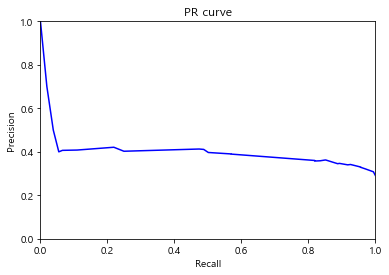

In [66]:
plot_precision_recall_curve(precisions, recalls)

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [68]:
fpr, tpr, _ = roc_curve(y_test, tree.predict_proba(x_test)[:,1])
auc(fpr, tpr)

0.649339834378144

In [69]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

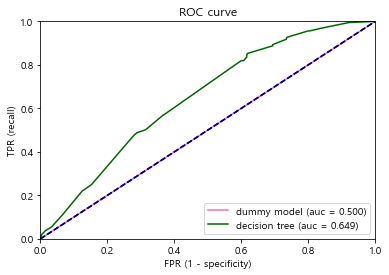

In [71]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, 
                                    dummy.predict_proba(x_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(y_test, 
                                  tree.predict_proba(x_test)[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'decision tree', 'darkgreen')